In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../dataset/cancer.csv',)
#encode sex data into 0 and 1
df = df.replace('F', 0)
df = df.replace('M', 1)
#encode diagnosis data into 0 1 and 2
df = df.replace('Y', 0)
df = df.replace('N', 1)
df = df.replace('S', 2)

In [3]:
#split data into X and Y
X = np.array(df.drop(['CA level'], axis=1))
Y = np.array(df['CA level'])
print(X.shape, Y.shape)


# #apply SelectKBest 
# k = 14
# selector = SelectKBest(f_classif, k=k)
# X_kbest = selector.fit_transform(X, Y)

# print('Original number of features:', X.shape[1])
# print('Reduced number of features:', X_kbest.shape[1])
# X_kbest = np.array(pd.DataFrame(X_kbest))
# X_kbest


(310, 14) (310,)


In [4]:
#scaling data
scaler = RobustScaler()
X = scaler.fit_transform(X)
print(X)

[[ 0.         -1.          0.         ...  1.06666667 -0.53469388
   1.45454545]
 [ 0.          0.          0.         ... -0.33333333 -0.28163265
   0.        ]
 [ 1.          0.          1.         ... -0.88333333 -0.85306122
   1.27272727]
 ...
 [ 0.          0.          1.         ... -0.13333333 -0.1755102
  -0.36363636]
 [ 0.          0.          1.         ... -0.33333333  0.64897959
  -0.09090909]
 [ 0.          0.          1.         ...  0.68333333 -0.45306122
   0.18181818]]


(248, 14) (248,)
(62, 14) (62,)


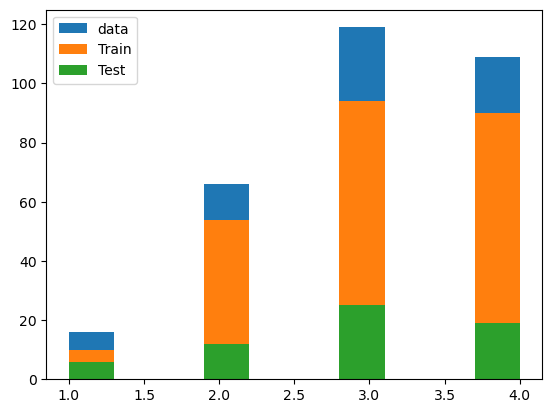

In [5]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
plt.hist(Y)
plt.hist(Y_train)
plt.hist(Y_test)
plt.legend(['data', 'Train', 'Test'])
plt.show()

In [6]:
def minkowski_distance(x1, x2, p):
    return np.sum(np.abs(x1 - x2) ** p, axis=1) ** (1 / p)

#knn function
def knn(k, p):
    y_pred = []
    for i in range(X_test.shape[0]):
        distance = minkowski_distance(X_train, X_test[i], p)
        distance = np.array(distance)
        distance = np.argsort(distance)
        distance = distance[:k]
        y_pred.append(np.bincount(Y_train[distance]).argmax())
    return y_pred

In [9]:
#testing the model
y_pred = knn(7, 2)
#compare the prediction with the actual result
countError = 0
for i in range(len(y_pred)):
    if(y_pred[i] != Y_test[i]):
        countError += 1
        print("prediction: ",y_pred[i], "actual: ",Y_test[i])
print("error: ", countError, "total: ", len(y_pred))
#calculate the accuracy
accuracy = np.sum(y_pred == Y_test) / len(Y_test)
print("accuracy: ", f"{accuracy:.2f}")

prediction:  3 actual:  4
prediction:  4 actual:  3
prediction:  3 actual:  2
prediction:  3 actual:  4
prediction:  3 actual:  4
prediction:  3 actual:  2
prediction:  3 actual:  1
prediction:  2 actual:  1
prediction:  4 actual:  2
prediction:  2 actual:  3
prediction:  2 actual:  3
prediction:  3 actual:  1
prediction:  4 actual:  3
prediction:  3 actual:  4
prediction:  3 actual:  4
prediction:  4 actual:  1
prediction:  2 actual:  3
prediction:  3 actual:  2
prediction:  3 actual:  2
prediction:  2 actual:  3
prediction:  3 actual:  4
prediction:  3 actual:  2
prediction:  2 actual:  1
error:  23 total:  62
accuracy:  0.63
